In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, mean_squared_error

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


the 1st step is to gain a basic understanding of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Seems that the last 2 columns are some prediction results and not relevant.
For the purpose of analysis, we decide to remove the last 2 columns

In [4]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [5]:
print(df.isnull().sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


ther is no missing values

In [6]:
df.duplicated().sum()

0

there is no duplicated data entries. we can now look at outliers

In [7]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [8]:
# checking CLIENTNUM

df['CLIENTNUM'].nunique()

10127

this shows each row is a client

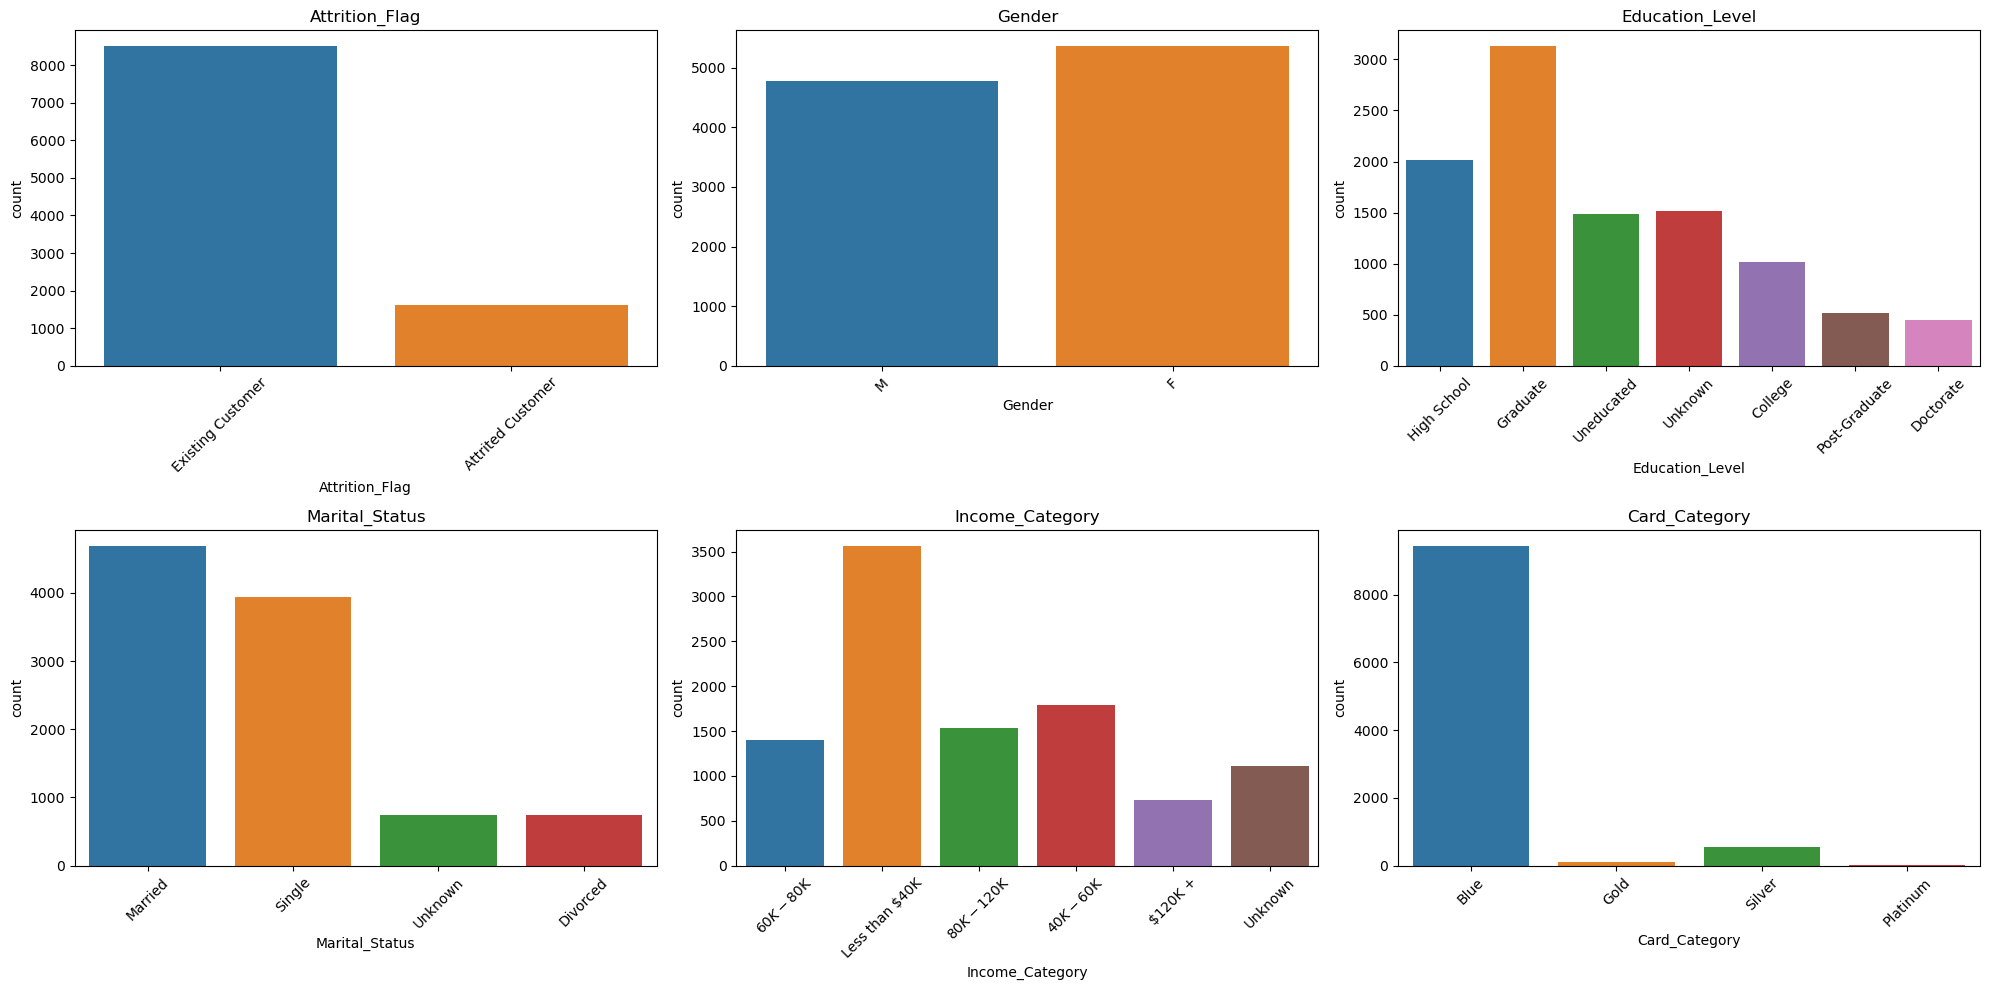

In [9]:
# Plotting categorical variables
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for ax, col in zip(axs.flatten(), categorical_cols):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: CLIENTNUM, dtype: int64


<Axes: xlabel='Attrition_Flag'>

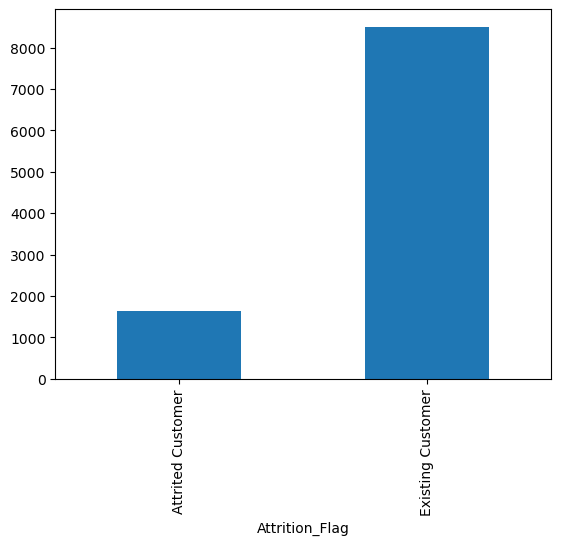

In [10]:
# checking Attrition_Flag
print(df.groupby('Attrition_Flag')['CLIENTNUM'].count())
df.groupby('Attrition_Flag')['CLIENTNUM'].count().plot(kind='bar')

there are 8500 existing cusomers and 1627 attrited cusomers

Gender
F    5358
M    4769
Name: CLIENTNUM, dtype: int64


<Axes: xlabel='Gender'>

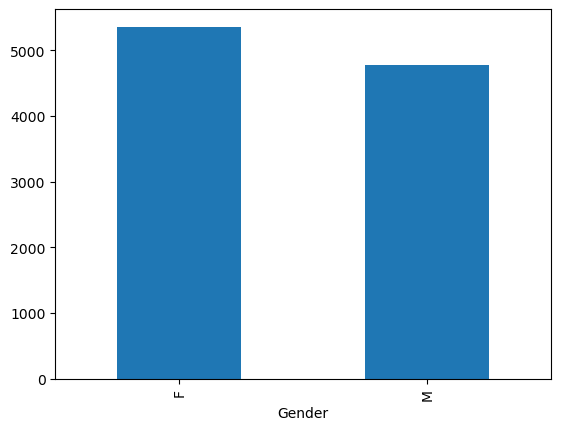

In [11]:
# checking Gender
print(df.groupby('Gender')['CLIENTNUM'].count())
df.groupby('Gender')['CLIENTNUM'].count().plot(kind='bar')

Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: CLIENTNUM, dtype: int64


<Axes: xlabel='Education_Level'>

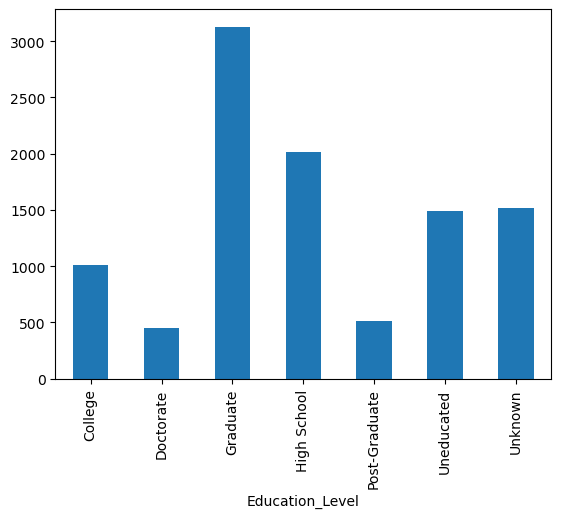

In [12]:
# checking Education_Level
print(df.groupby('Education_Level')['CLIENTNUM'].count())
df.groupby('Education_Level')['CLIENTNUM'].count().plot(kind='bar')

Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
Name: CLIENTNUM, dtype: int64


<Axes: xlabel='Income_Category'>

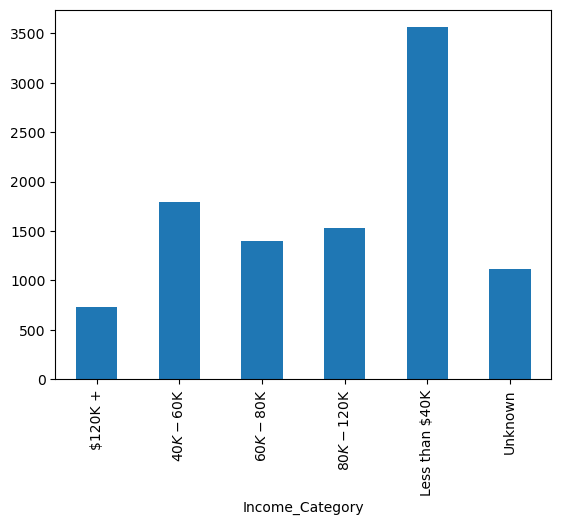

In [13]:
# checking Income_Category
print(df.groupby('Income_Category')['CLIENTNUM'].count())
df.groupby('Income_Category')['CLIENTNUM'].count().plot(kind='bar')

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
Name: CLIENTNUM, dtype: int64


<Axes: xlabel='Card_Category'>

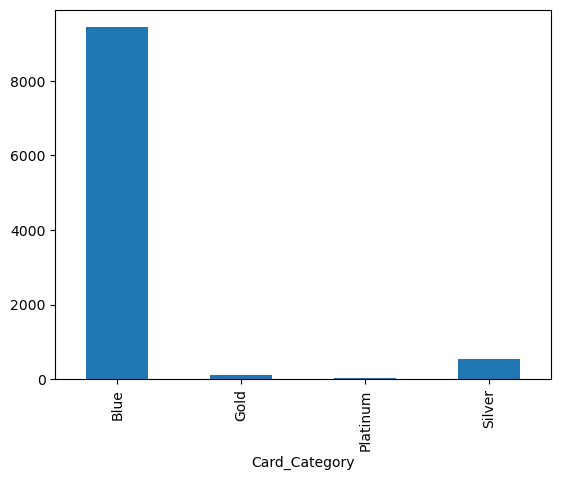

In [14]:
# checking Card_Category
print(df.groupby('Card_Category')['CLIENTNUM'].count())
df.groupby('Card_Category')['CLIENTNUM'].count().plot(kind='bar')

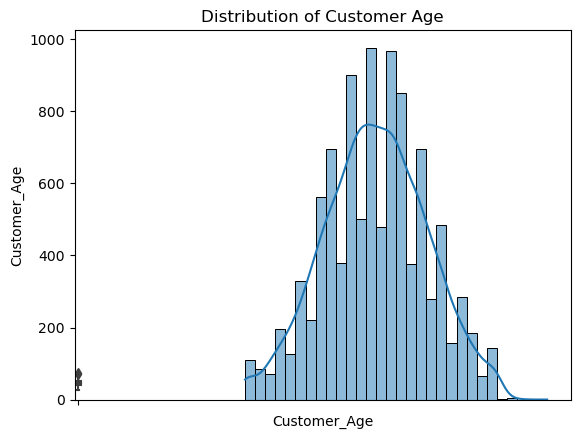

In [15]:
# checking Customer_Age

sns.boxplot(data=df.reset_index(),y='Customer_Age')

sns.histplot(df['Customer_Age'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.show()

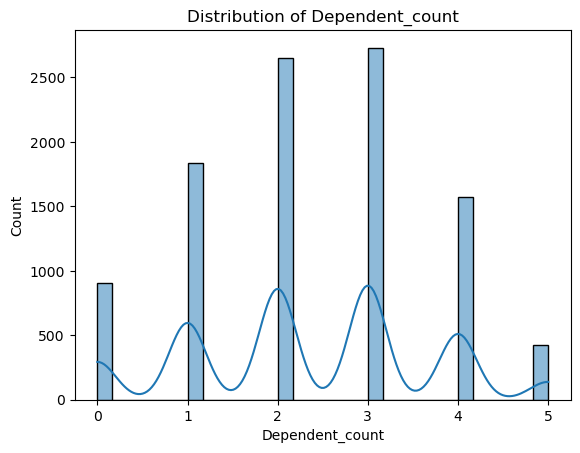

<Axes: ylabel='Dependent_count'>

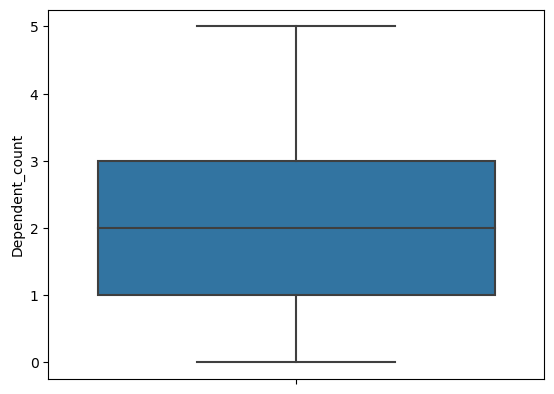

In [16]:
# checking Dependent_count
sns.histplot(df['Dependent_count'], kde=True, bins=30)
plt.title('Distribution of Dependent_count')
plt.show()

sns.boxplot(data=df.reset_index(),y='Dependent_count')

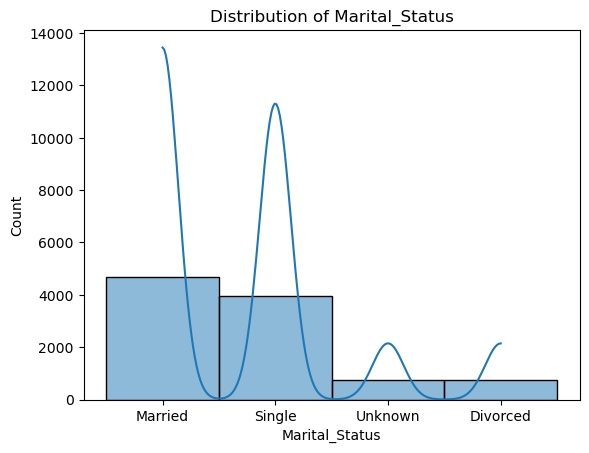

Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
Name: CLIENTNUM, dtype: int64


<Axes: xlabel='Marital_Status'>

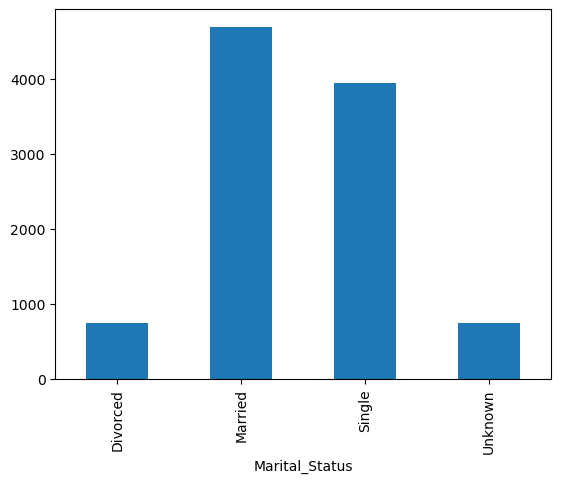

In [17]:
# checking Marital_Status
sns.histplot(df['Marital_Status'], kde=True, bins=30)
plt.title('Distribution of Marital_Status')
plt.show()

print(df.groupby('Marital_Status')['CLIENTNUM'].count())
df.groupby('Marital_Status')['CLIENTNUM'].count().plot(kind='bar')

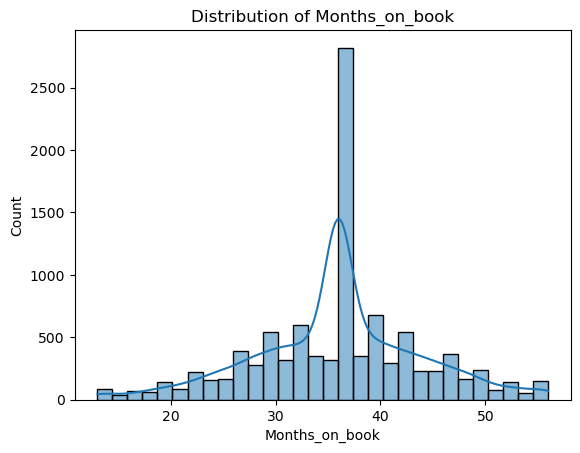

<Axes: ylabel='Months_on_book'>

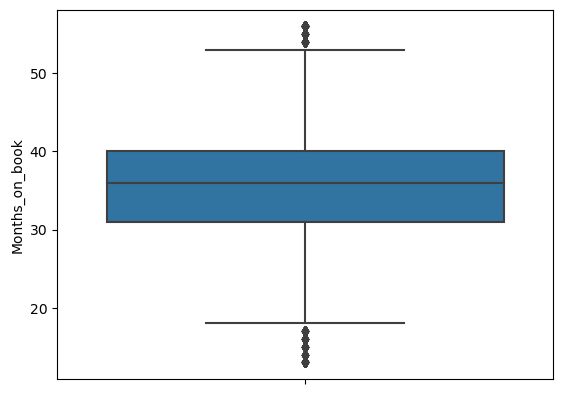

In [18]:
# checking Months_on_book
sns.histplot(df['Months_on_book'], kde=True, bins=30)
plt.title('Distribution of Months_on_book')
plt.show()

sns.boxplot(data=df.reset_index(),y='Months_on_book')

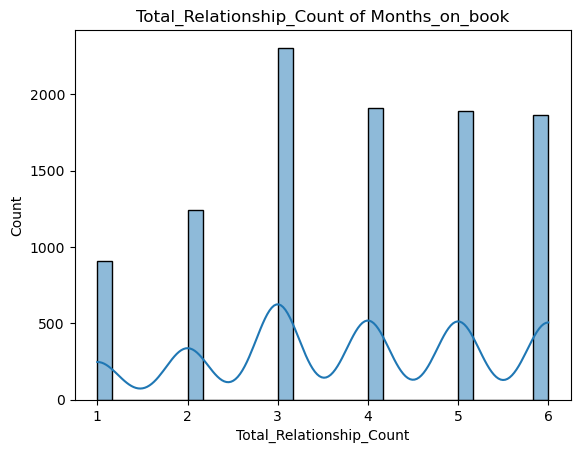

<Axes: ylabel='Total_Relationship_Count'>

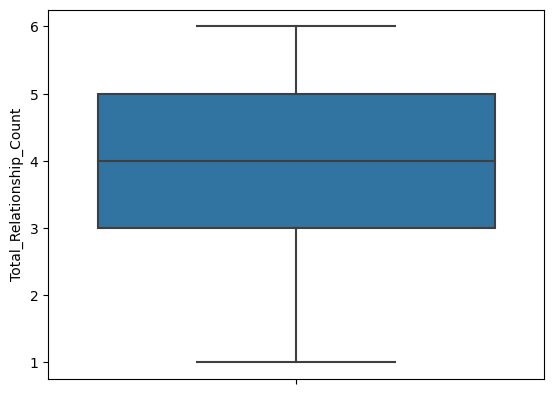

In [19]:
# checking Total_Relationship_Count
sns.histplot(df['Total_Relationship_Count'], kde=True, bins=30)
plt.title('Total_Relationship_Count of Months_on_book')
plt.show()

sns.boxplot(data=df.reset_index(),y='Total_Relationship_Count')

<Axes: ylabel='Months_Inactive_12_mon'>

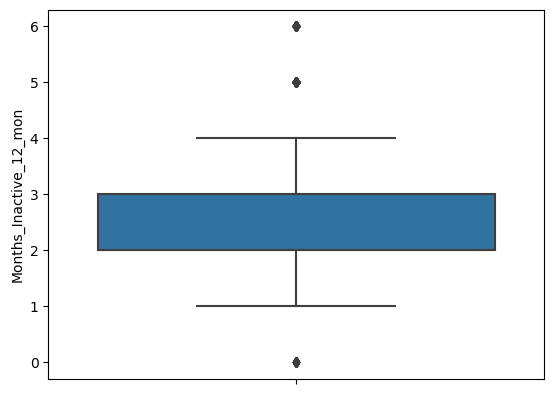

In [20]:
# checking Months_Inactive_12_mon
sns.boxplot(data=df.reset_index(),y='Months_Inactive_12_mon')

<Axes: ylabel='Contacts_Count_12_mon'>

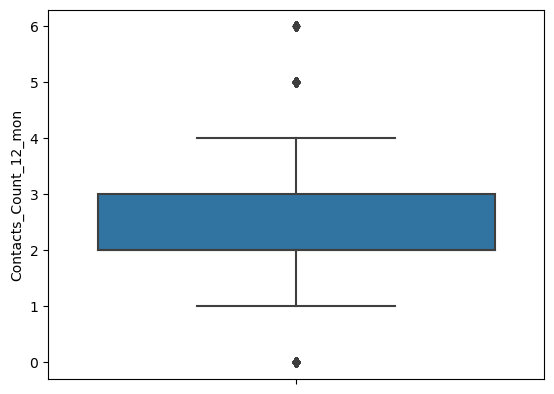

In [21]:
# checking Contacts_Count_12_mon
sns.boxplot(data=df.reset_index(),y='Contacts_Count_12_mon')

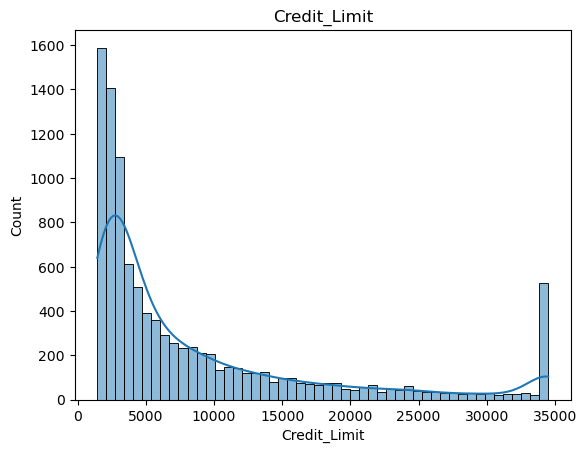

<Axes: ylabel='Credit_Limit'>

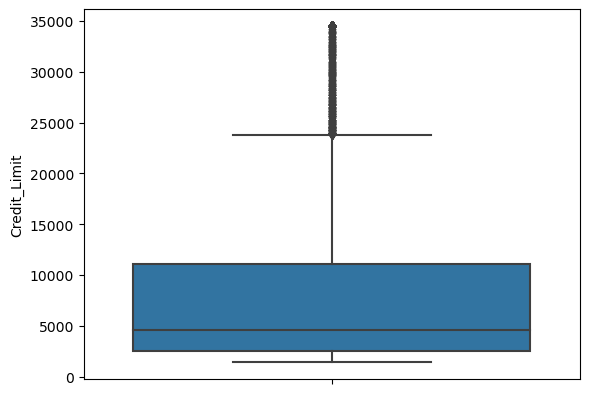

In [22]:
# checking Credit_Limit
sns.histplot(df['Credit_Limit'], kde=True, bins=50)
plt.title('Credit_Limit')
plt.show()

sns.boxplot(data=df.reset_index(),y='Credit_Limit')

The spike of credit_limit that is over 33000 in the distribution seems abrupt.
Plotting to see what might be the cause.

In [23]:
high_credit_limit = df[df['Credit_Limit']>33000]
high_credit_limit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
45,712661433,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,...,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
65,788979258,Existing Customer,51,M,4,Uneducated,Single,$80K - $120K,Silver,38,...,1,4,34516.0,1515,33001.0,0.592,1293,32,0.600,0.044
70,715971108,Existing Customer,51,M,4,Graduate,Single,$120K +,Blue,42,...,2,3,34516.0,1763,32753.0,1.266,1550,41,1.050,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,709188108,Existing Customer,45,M,2,Graduate,Single,$60K - $80K,Silver,33,...,2,2,34516.0,1529,32987.0,0.609,13940,105,0.810,0.044
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,...,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10098,716644008,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,36,...,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
10110,718225683,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,...,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032


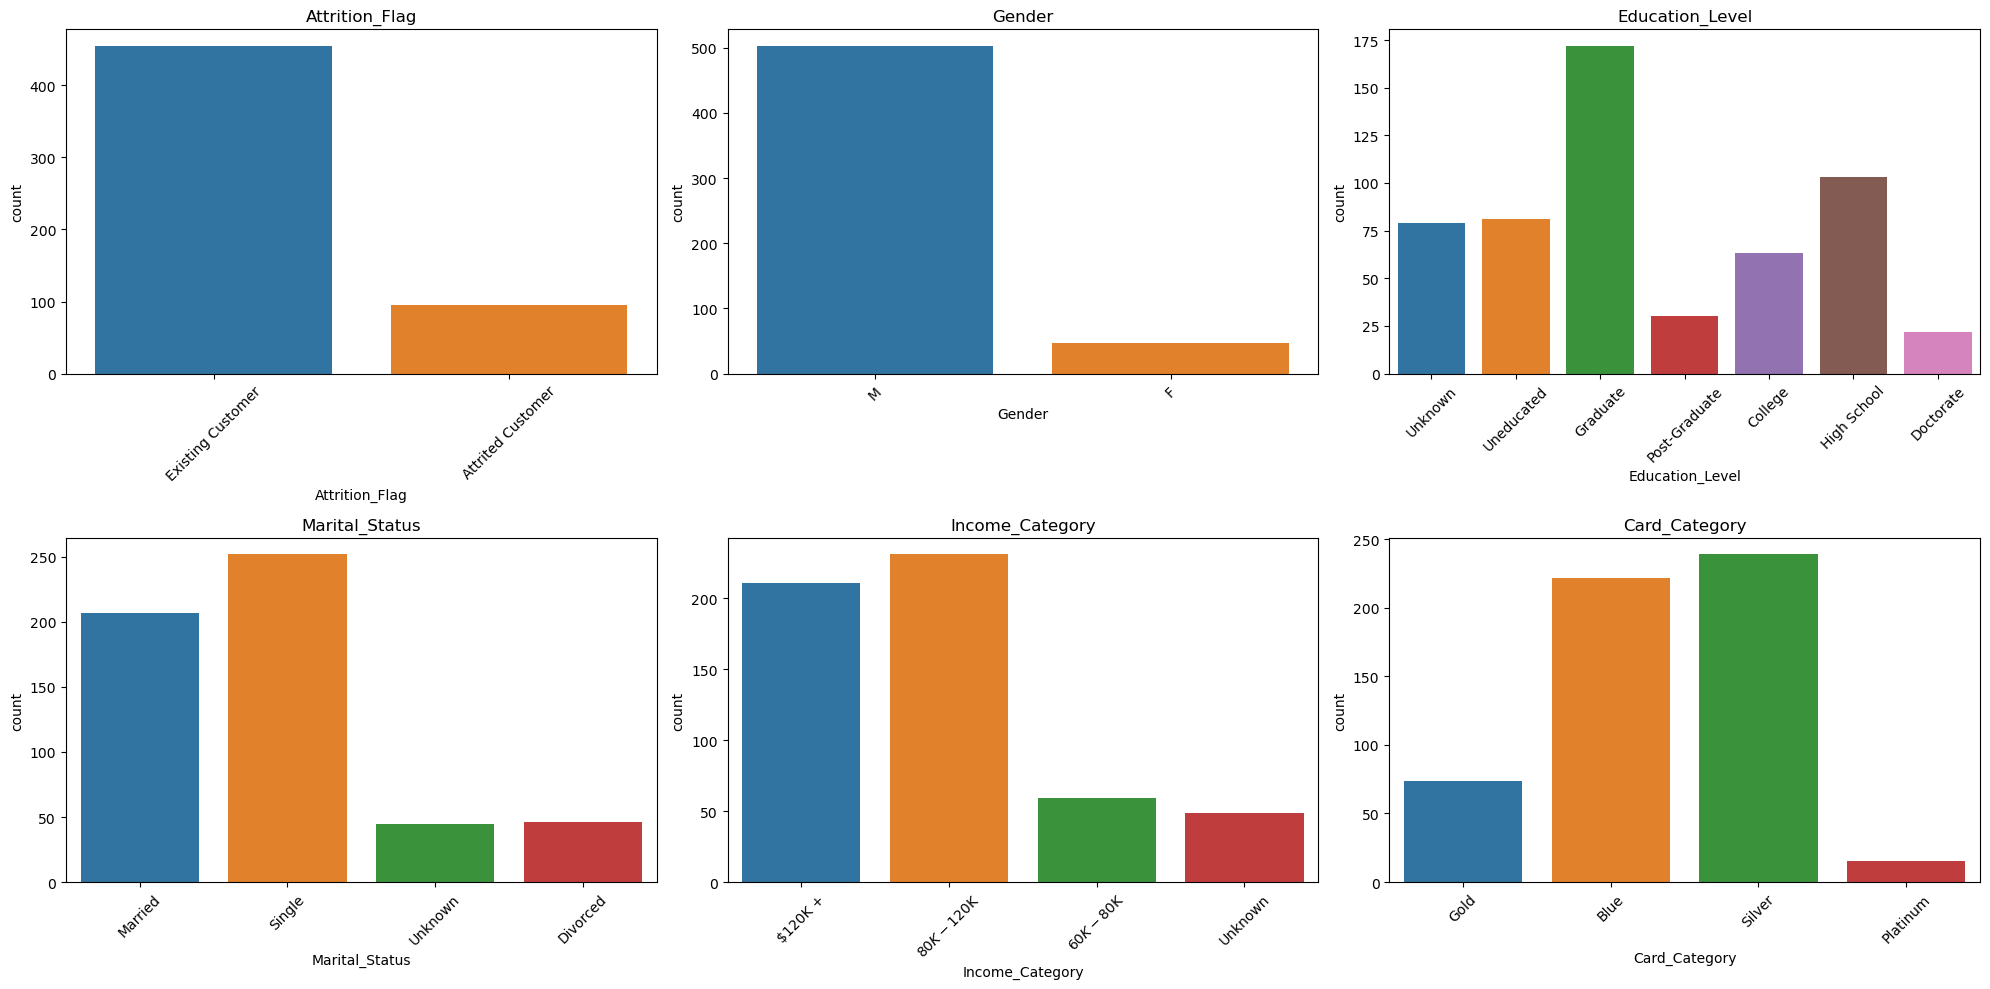

In [24]:
# Plotting categorical variables for customers with a high credit limit

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for ax, col in zip(axs.flatten(), categorical_cols):
    sns.countplot(x=high_credit_limit[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Compared to the population, this 550 customers with over 33000 credit limit display similar distributions in Attrition_flag, Education_level, and Marital status. However:

- The gender distribution is quite different. 500 out of this 550 high credit limit customers are male, which is 90%. In the total dataset, this ratio is only about 48%.
- The Income_category is quite different. Most of the income category are 80k-120k and 120k+. This might be the cause why they have higher credit limit.
- There are higher Gold, Silver and Platinum credit card percentages, compared to the total where most of the cards are Blue card.

In this case, the high credit limits can be explained by hihger income, gender income inequality, and card type with higher limits. Thus, we would keep those high credit limit customers and not treat them as outliers.

In [25]:
# checking Total_Revolving_Bal
sns.histplot(df['Total_Revolving_Bal'], kde=True, bins=50)
plt.title('Total_Revolving_Bal')
plt.show()

sns.boxplot(data=df.reset_index(),y='Total_Revolving_Bal')

KeyboardInterrupt: 

In [ ]:
zero_rev_bal = df[df['Total_Revolving_Bal']==0]
zero_rev_bal.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,2.470000e+03,2470,2470.000000,2470,2470.000000,2470,2470,2470,2470,2470.000000,...,2470.000000,2470.000000,2470.000000,2470.0,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.0
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1577,NaN,1376,NaN,744,1073,899,2323,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.381795e+08,NaN,46.150202,NaN,2.354251,NaN,NaN,NaN,NaN,35.834413,...,2.423077,2.586640,8039.114251,0.0,8039.114251,0.735487,4000.153846,61.427530,0.674879,0.0
std,3.641100e+07,NaN,7.931237,NaN,1.289115,NaN,NaN,NaN,NaN,8.001146,...,1.012455,1.137198,8851.471590,0.0,8851.471590,0.208331,2874.128787,22.141803,0.235288,0.0
min,7.080855e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.0,1438.300000,0.000000,510.000000,10.000000,0.000000,0.0
25%,7.128562e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,1852.000000,0.0,1852.000000,0.612250,2198.500000,43.000000,0.536000,0.0
50%,7.175080e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,3.000000,4184.000000,0.0,4184.000000,0.726000,3601.000000,63.000000,0.674000,0.0
75%,7.723029e+08,NaN,51.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,10593.250000,0.0,10593.250000,0.847000,4605.500000,78.000000,0.800000,0.0


it's interesting to see 2470 customers which is about 24.7% people keep a zero revolving balance.

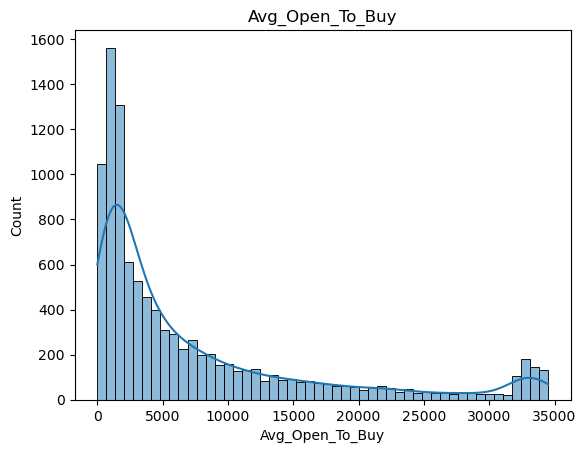

<Axes: ylabel='Avg_Open_To_Buy'>

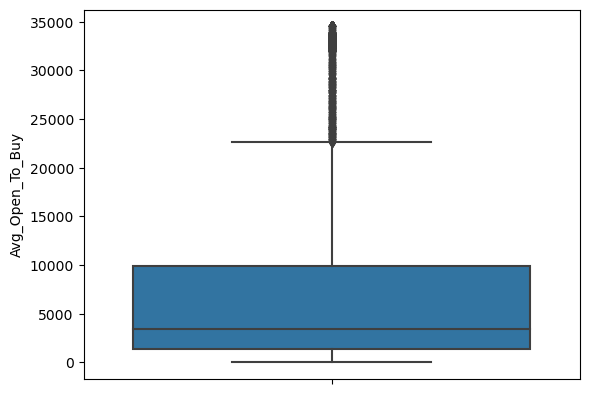

In [ ]:
# checking Avg_Open_To_Buy
sns.histplot(df['Avg_Open_To_Buy'], kde=True, bins=50)
plt.title('Avg_Open_To_Buy')
plt.show()

sns.boxplot(data=df.reset_index(),y='Avg_Open_To_Buy')

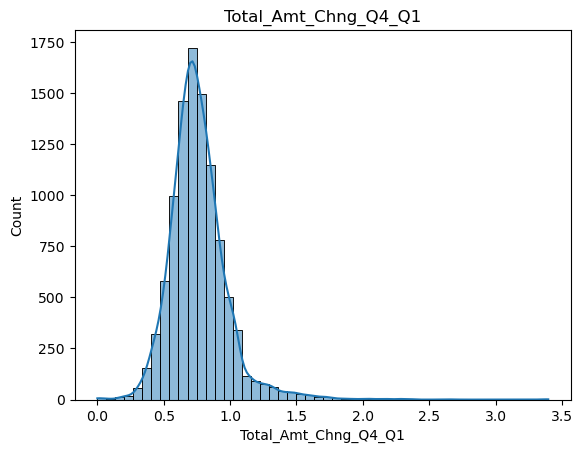

<Axes: ylabel='Total_Amt_Chng_Q4_Q1'>

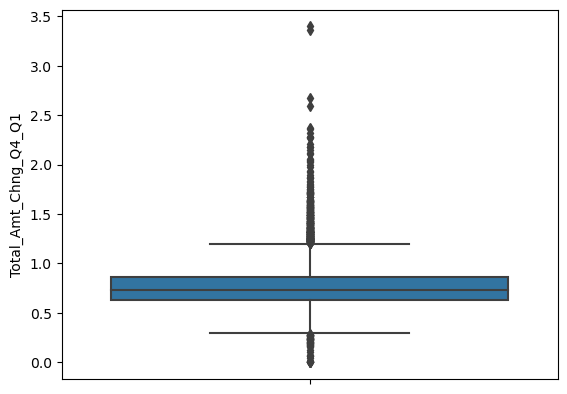

In [ ]:
# checking Total_Amt_Chng_Q4_Q1
sns.histplot(df['Total_Amt_Chng_Q4_Q1'], kde=True, bins=50)
plt.title('Total_Amt_Chng_Q4_Q1')
plt.show()

sns.boxplot(data=df.reset_index(),y='Total_Amt_Chng_Q4_Q1')

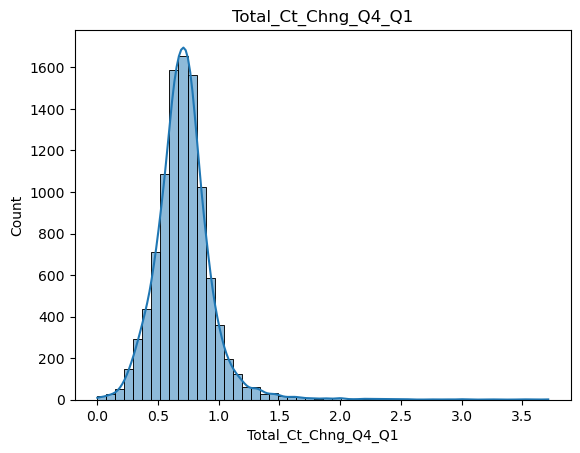

<Axes: ylabel='Total_Ct_Chng_Q4_Q1'>

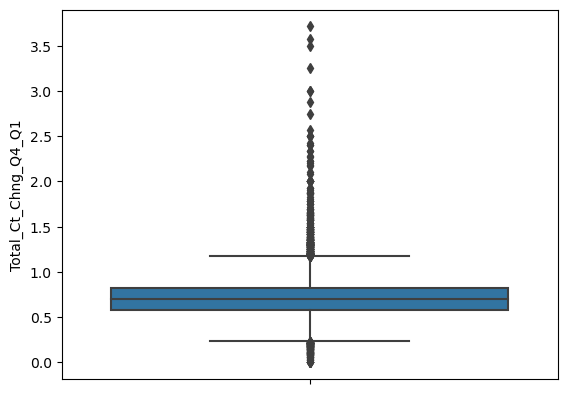

In [ ]:
# checking Total_Ct_Chng_Q4_Q1
sns.histplot(df['Total_Ct_Chng_Q4_Q1'], kde=True, bins=50)
plt.title('Total_Ct_Chng_Q4_Q1')
plt.show()

sns.boxplot(data=df.reset_index(),y='Total_Ct_Chng_Q4_Q1')

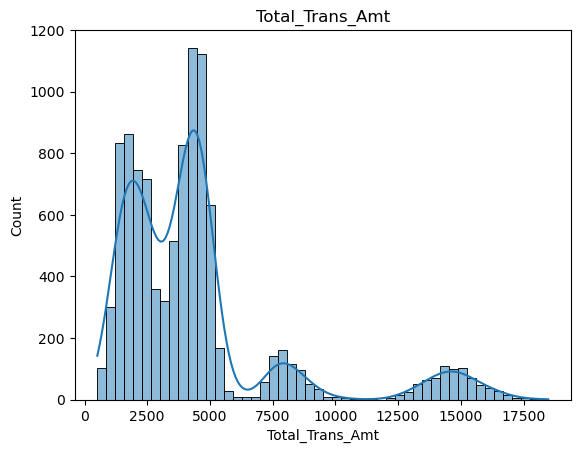

<Axes: ylabel='Total_Trans_Amt'>

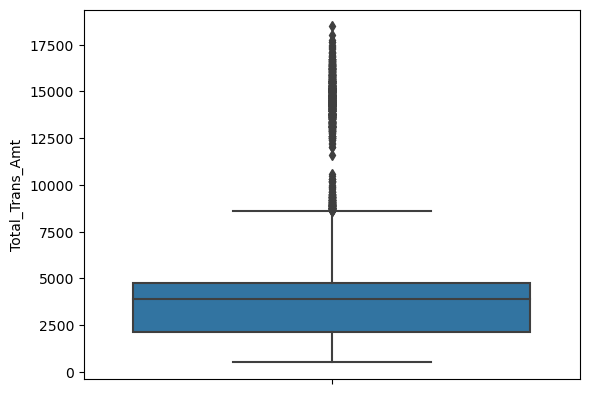

In [ ]:
# checking Total_Trans_Amt
sns.histplot(df['Total_Trans_Amt'], kde=True, bins=50)
plt.title('Total_Trans_Amt')
plt.show()

sns.boxplot(data=df.reset_index(),y='Total_Trans_Amt')

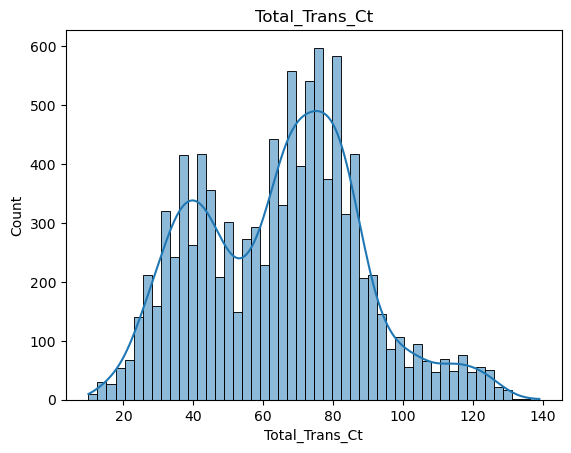

<Axes: ylabel='Total_Trans_Ct'>

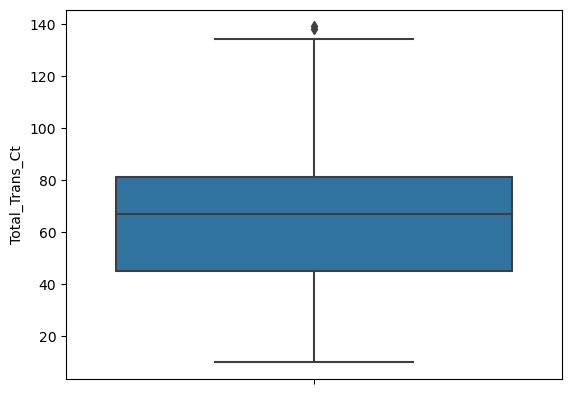

In [ ]:
# checking Total_Trans_Ct
sns.histplot(df['Total_Trans_Ct'], kde=True, bins=50)
plt.title('Total_Trans_Ct')
plt.show()

sns.boxplot(data=df.reset_index(),y='Total_Trans_Ct')

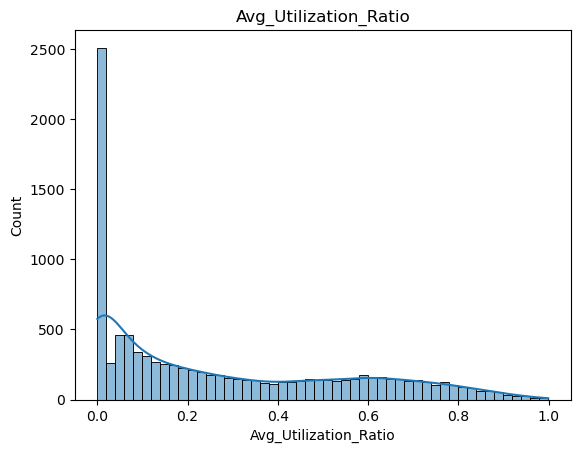

<Axes: ylabel='Avg_Utilization_Ratio'>

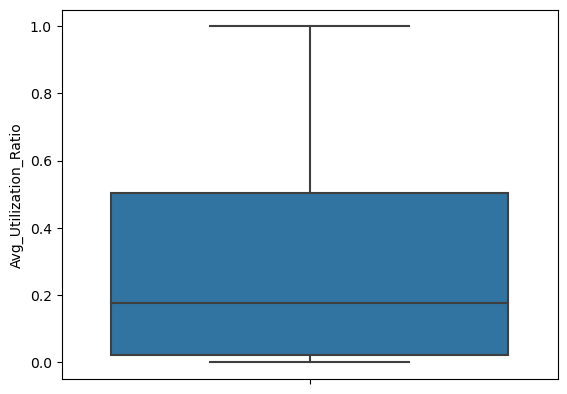

In [ ]:
# checking Avg_Utilization_Ratio
sns.histplot(df['Avg_Utilization_Ratio'], kde=True, bins=50)
plt.title('Avg_Utilization_Ratio')
plt.show()

sns.boxplot(data=df.reset_index(),y='Avg_Utilization_Ratio')

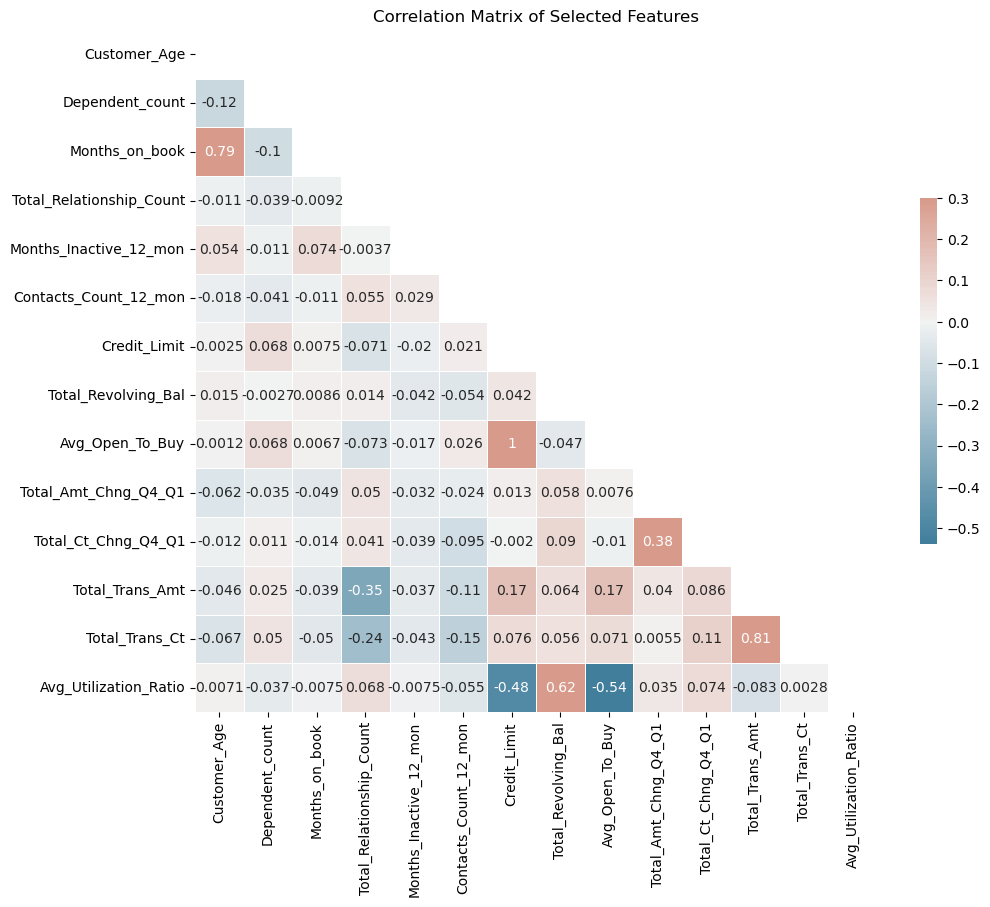

In [ ]:
# Selecting numerical columns for correlation matrix
# numerical_cols = ['Customer_Age', 'Months_on_book', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Utilization_Ratio']
numerical_cols = ['Customer_Age', 'Dependent_count','Months_on_book', 'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

# Compute the correlation matrix
corr = df[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of Selected Features')
plt.show()


- The correlations between Credit_Limit and Avg_Open_To_Buy is 1, this is actually making sense as Avg_Open_To_Buy is the average amount that the customer could spend using their credit card, which is directly linked to credit limit.
- The months_on_book and Customer_Age also has a correlation coefficient of 0.79. This suggests that as customers get older, they also tend to have a longer relationship with the bank. This makes intuitive sense as older customers have had more time to be customers of the bank.
- The correlation between Credit_Limit and Avg_Utilization_Ratio is -0.48, this suggests moderate negative correlation. The primary reason is that the Avg_Utilization_Ratio is the average card utilization ratio, which is calculated as the total amount spent divided by the credit limit. This might also suggest that a high utilization ratio might indicate that a customer is relying heavily on their credit card, which could be a sign of financial stress and might increase the likelihood of churn.

# feature engineering


## feature engineering ideas
1. new feature --> feature reduction
2. dummy variables
3. scaling
4. feature selection use scv

feature reduction

instead of using Total_Trans_Amt and Total_Trans_Ct, we use a new numeric variable Avg_Trans to show the average transaction amount per each transaction. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df['Avg_Trans'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']

In [ ]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,27.238095
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,39.121212
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,94.350000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,58.550000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,29.142857


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans'],
      dtype='object')

Based on corelation matrix, we will pick one from high correlation pairs:
credit limit and Avg_Open_To_Buy --> pick credit limit
Months_on_book and Customer_Age --> pick months on book

Now we select the features we need to use before doing the feature importance test:

In [ ]:
df_selection = df[['Attrition_Flag', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans']]
df_selection.reset_index()
df_selection

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1.625,0.061,27.238095
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,3.714,0.105,39.121212
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,2.333,0.000,94.350000
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,2.333,0.760,58.550000
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,2.500,0.000,29.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,0.857,0.462,132.273504
10123,Attrited Customer,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.804,0.683,0.511,127.014493
10124,Attrited Customer,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,0.818,0.000,171.516667
10125,Attrited Customer,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.535,0.722,0.000,135.403226


We find that for the feature 'Avg_Utilization_Ratio_Log', many values of its original plot are aggregated to 0, so we take log to try to make its distribution closer to normal to reduce the influence of this feature on the model (e.g. knn).

In [ ]:
df_selection['Avg_Utilization_Ratio_Log'] = np.log(df_selection['Avg_Utilization_Ratio'] + 0.01)

C:\Users\anton\AppData\Local\Temp\ipykernel_38288\3241850116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection['Avg_Utilization_Ratio_Log'] = np.log(df_selection['Avg_Utilization_Ratio'] + 0.01)


Now we do feature scales. 
we noticed that some features have different scale.     
We are going to apply standardization.    
The goal of standardization is to scale all features to the same scale. In the normalization process, the value of each feature is subtracted from its mean and then divided by its standard deviation. After this treatment, the mean value of each feature is 0 and the standard deviation is 1. This means that even though the range of features varies greatly on the original scale, after standardization, they will all be on roughly the same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# List of numerical variables
num_vars = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
            'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
            'Avg_Utilization_Ratio', 'Avg_Trans', 'Avg_Utilization_Ratio_Log']

# Perform standardization
df_selection[num_vars] = scaler.fit_transform(df_selection[num_vars])

df_selection.head()

C:\Users\anton\AppData\Local\Temp\ipykernel_38288\1920759270.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection[num_vars] = scaler.fit_transform(df_selection[num_vars])


,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans,Avg_Utilization_Ratio_Log
0,Existing Customer,M,0.503368,High School,Married,$60K - $80K,Blue,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,3.834003,-0.775882,-1.339801,-0.324693
1,Existing Customer,F,2.043199,Graduate,Single,Less than $40K,Blue,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,12.608573,-0.616276,-0.889732,-0.026281
2,Existing Customer,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,6.807864,-0.997155,1.202038,-1.537577
3,Existing Customer,F,1.273283,High School,Unknown,Less than $40K,Blue,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,6.807864,1.759686,-0.153874,1.150318
4,Existing Customer,M,0.503368,Uneducated,Married,$60K - $80K,Blue,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,7.509325,-0.997155,-1.267659,-1.537577


In [ ]:
df_selection[df_selection['Education_Level']=='Unknown']

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans,Avg_Utilization_Ratio_Log
6,Existing Customer,M,1.273283,Unknown,Married,$120K +,Gold,1.261152,1.407306,-1.327136,0.492404,2.848054,1.351236,5.543256,0.041070,-0.757745,-0.746490,-0.282583
11,Existing Customer,M,-1.036462,Unknown,Married,$40K - $60K,Blue,2.262903,1.407306,-0.337598,0.492404,0.050950,0.520507,3.070583,2.737706,-0.365984,-0.457308,0.264551
15,Existing Customer,M,1.273283,Unknown,Unknown,$80K - $120K,Blue,0.134183,0.763943,-1.327136,-0.411616,-0.483912,-0.234143,4.320606,4.149030,-0.162848,-0.480508,0.428965
17,Existing Customer,M,0.503368,Unknown,Married,$80K - $120K,Blue,-0.241473,0.120579,1.641478,-1.315636,0.539488,0.157294,-0.487877,3.834003,-0.652550,-0.517380,-0.082574
23,Existing Customer,F,1.273283,Unknown,Single,Less than $40K,Blue,0.008965,-0.522785,0.651940,-0.411616,-0.675587,0.487376,-0.852847,-1.508866,1.273611,-0.517223,1.032011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,Existing Customer,F,0.503368,Unknown,Married,$40K - $60K,Blue,-1.744099,0.763943,0.651940,0.492404,0.476000,1.362280,-0.693173,-0.357965,-0.362356,3.815151,0.267905
10094,Existing Customer,M,-1.036462,Unknown,Single,$60K - $80K,Blue,1.511590,-0.522785,-1.327136,-0.411616,-0.147877,-1.426858,-0.547185,0.007467,-0.997155,2.322812,-1.537577
10095,Existing Customer,M,0.503368,Unknown,Married,$80K - $120K,Blue,-0.366692,0.120579,-1.327136,0.492404,2.848054,-0.078305,0.255750,-0.395769,-0.881077,2.962003,-0.649563
10118,Attrited Customer,M,-1.036462,Unknown,Unknown,$80K - $120K,Blue,0.008965,1.407306,0.651940,1.396424,0.146017,-0.258684,0.296809,1.628809,-0.648922,3.826780,-0.076708


Now we create dummy variable for categorical data:
Education_Level	
Marital_Status	
Income_Category	
Card_Category

In [ ]:

# Create dummy variables for the 'Education_Level' and 'Income_Category' columns
dummy_Education_Level = pd.get_dummies(df_selection['Education_Level'], prefix='Education')
dummy_Income_category = pd.get_dummies(df_selection['Income_Category'], prefix='Income')
dummy_Marital_Status = pd.get_dummies(df_selection['Marital_Status'], prefix='Marital')
dummy_Card_Category = pd.get_dummies(df_selection['Card_Category'], prefix='Card')

# Concatenate the original DataFrame with the dummy DataFrames
df_new_select = pd.concat([df_selection, dummy_Education_Level, dummy_Income_category,dummy_Marital_Status,dummy_Card_Category], axis=1)

# Drop original 'Education_Level' and 'Income_Category' columns
df_new_select.drop(['Education_Level', 'Income_Category','Marital_Status','Card_Category'], axis=1, inplace=True)

# Display the first few rows of the DataFrame
df_new_select.head()


,Attrition_Flag,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Income_Less than $40K,Income_Unknown,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,Existing Customer,M,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,...,0,0,0,1,0,0,1,0,0,0
1,Existing Customer,F,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,...,1,0,0,0,1,0,1,0,0,0
2,Existing Customer,M,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,...,0,0,0,1,0,0,1,0,0,0
3,Existing Customer,F,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,...,1,0,0,0,0,1,1,0,0,0
4,Existing Customer,M,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_new_select.columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans', 'Avg_Utilization_Ratio_Log', 'Education_College',
       'Education_Doctorate', 'Education_Graduate', 'Education_High School',
       'Education_Post-Graduate', 'Education_Uneducated', 'Education_Unknown',
       'Income_$120K +', 'Income_$40K - $60K', 'Income_$60K - $80K',
       'Income_$80K - $120K', 'Income_Less than $40K', 'Income_Unknown',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Unknown', 'Card_Blue', 'Card_Gold', 'Card_Platinum',
       'Card_Silver'],
      dtype='object')

Convert binary variable to machine readable value, 0s and 1s
for attrition_flag, we treat existing customer as 0 and attrited customer as 1
for gender, we treat male is 1 and female is 0.

In [ ]:
df_new_select['Attrition_Flag'] = df_new_select['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
df_new_select['Gender'] = df_new_select['Gender'].replace({'F':0, 'M':1})
df_new_select.head(5)

,Attrition_Flag,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Income_Less than $40K,Income_Unknown,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,0,1,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,...,1,0,0,0,1,0,1,0,0,0
2,0,1,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,...,1,0,0,0,0,1,1,0,0,0
4,0,1,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,...,0,0,0,1,0,0,1,0,0,0


Now we do further feature selection by using SVC model and its feature importance function

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [ ]:
df_new_select.columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans', 'Avg_Utilization_Ratio_Log', 'Education_College',
       'Education_Doctorate', 'Education_Graduate', 'Education_High School',
       'Education_Post-Graduate', 'Education_Uneducated', 'Education_Unknown',
       'Income_$120K +', 'Income_$40K - $60K', 'Income_$60K - $80K',
       'Income_$80K - $120K', 'Income_Less than $40K', 'Income_Unknown',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Unknown', 'Card_Blue', 'Card_Gold', 'Card_Platinum',
       'Card_Silver'],
      dtype='object')

In [ ]:
svc = SVC(kernel='linear',random_state=1234)

In [ ]:
x = df_new_select[['Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Avg_Trans', 'Credit_Limit',
       'Total_Revolving_Bal', 'Education_College', 'Education_Doctorate',
       'Education_Graduate', 'Education_High School',
       'Education_Post-Graduate', 'Education_Uneducated', 'Education_Unknown',
       'Income_$120K +', 'Income_$40K - $60K', 'Income_$60K - $80K',
       'Income_$80K - $120K', 'Income_Less than $40K', 'Income_Unknown',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Unknown', 'Card_Blue', 'Card_Gold', 'Card_Platinum',
       'Card_Silver']]
y = df_new_select[['Attrition_Flag']]

In [ ]:
svc.fit(x,y)

c:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=1234)

In [ ]:
Feature_select = RFE(estimator=svc)

In [ ]:
Feature_select.fit(x, y)


c:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anton\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

RFE(estimator=SVC(kernel='linear', random_state=1234))

In [ ]:
df_feature = df_new_select[['Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Avg_Trans', 'Credit_Limit',
       'Total_Revolving_Bal', 'Education_College', 'Education_Doctorate',
       'Education_Graduate', 'Education_High School',
       'Education_Post-Graduate', 'Education_Uneducated', 'Education_Unknown',
       'Income_$120K +', 'Income_$40K - $60K', 'Income_$60K - $80K',
       'Income_$80K - $120K', 'Income_Less than $40K', 'Income_Unknown',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Unknown', 'Card_Blue', 'Card_Gold', 'Card_Platinum',
       'Card_Silver']]

In [ ]:
feature_rankings = Feature_select.ranking_
ranking_df = pd.DataFrame({'Feature': df_feature.columns, 'Rank': feature_rankings})
ranking_df = ranking_df.sort_values(by='Rank')

In [ ]:
ranking_df

,Feature,Rank
0,Gender,1
20,Income_$40K - $60K,1
13,Education_Doctorate,1
22,Income_$80K - $120K,1
11,Total_Revolving_Bal,1
10,Credit_Limit,1
9,Avg_Trans,1
31,Card_Platinum,1
23,Income_Less than $40K,1
24,Income_Unknown,1


# Decision Tree

For this case we did feature engineering above and we choose features below and these will be the features for our model.    

In [ ]:
features = df_new_select[['Attrition_Flag', 'Gender', 'Dependent_count', 
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Ct_Chng_Q4_Q1','Avg_Trans',
       'Credit_Limit','Total_Revolving_Bal',  'Education_Doctorate',
       'Education_Post-Graduate', 'Income_$120K +', 'Income_$40K - $60K', 
       'Income_$60K - $80K','Income_$80K - $120K', 'Income_Less than $40K', 
       'Income_Unknown','Marital_Married',  'Card_Blue',  'Card_Platinum']]

Firstly, we import necessary libraries.    
and define X and y. X will be the features we choose, y will be our target.    
we used one-hot encoding for the categorical variables.    
Unique thermal coding is a method of converting categorical variables into binary vectors. This is because most machine learning models require numerical input.     

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define X and y
X = features.drop('Attrition_Flag', axis=1)
y = features['Attrition_Flag']


In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

we used dicision tree model here.    
during it process it can choose the important feature itself again.    
now use hyperparameters to set parameters before machine learning.    
first we set a number for max_depth, min_samples_leaf and max_features, the grid search will try all the combinations of our parameters and retuen the best combination.    
then use gridsearch cv, it will try all combinations in params and us cv =5 to assess model performance.    
use X-train and y_train to train the model.    
In the end we get the best model best_dt.    

In [ ]:
# Initialize a decision tree classifier
dt = DecisionTreeClassifier(random_state=1234)

# Define the hyperparameters for grid search
params = {'max_depth': list(range(1, 10)),
          'min_samples_leaf': list(range(1, 10)),
          'max_features': ['auto', 'sqrt', 'log2']}

# Grid search with cross-validation
grid_search = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users

c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users

In [ ]:
# Predict the test set results
y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, mean_squared_error

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Display the results
print('Best Parameters:', grid_search.best_params_)
print(f'Decision Tree ROC AUC Score: {roc_auc_score(y_test, y_prob[:,1])}')
print('Decision Tree Accuracy:', accuracy)
print('Decision Tree Precision:', precision)
print('Decision Tree Recall:', recall)
print('Decision Tree F1 Score:', f1)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

best_dt

Best Parameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 6}
Decision Tree ROC AUC Score: 0.8340054689063839
Decision Tree Accuracy: 0.8721618953603159
Decision Tree Precision: 0.7027027027027027
Decision Tree Recall: 0.32601880877742945
Decision Tree F1 Score: 0.44539614561027835
Confusion Matrix:
 [[1663   44]
 [ 215  104]]


DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_leaf=6,
                       random_state=1234)

[Text(0.5019329896907216, 0.9285714285714286, 'Total_Trans_Ct <= 54.5\ngini = 0.273\nsamples = 7595\nvalue = [1241, 6354]\nclass = Attrited Customer'),
 Text(0.24871134020618557, 0.7857142857142857, 'Total_Revolving_Bal <= 656.5\ngini = 0.471\nsamples = 2580\nvalue = [982, 1598]\nclass = Attrited Customer'),
 Text(0.12371134020618557, 0.6428571428571429, 'Total_Ct_Chng_Q4_Q1 <= 0.662\ngini = 0.386\nsamples = 849\nvalue = [627, 222]\nclass = Existing Customer'),
 Text(0.06701030927835051, 0.5, 'Total_Trans_Amt <= 2073.0\ngini = 0.287\nsamples = 650\nvalue = [537, 113]\nclass = Existing Customer'),
 Text(0.041237113402061855, 0.35714285714285715, 'Total_Relationship_Count <= 3.5\ngini = 0.42\nsamples = 313\nvalue = [219, 94]\nclass = Existing Customer'),
 Text(0.020618556701030927, 0.21428571428571427, 'Total_Trans_Ct <= 47.5\ngini = 0.26\nsamples = 182\nvalue = [154, 28]\nclass = Existing Customer'),
 Text(0.010309278350515464, 0.07142857142857142, 'gini = 0.201\nsamples = 168\nvalue = 

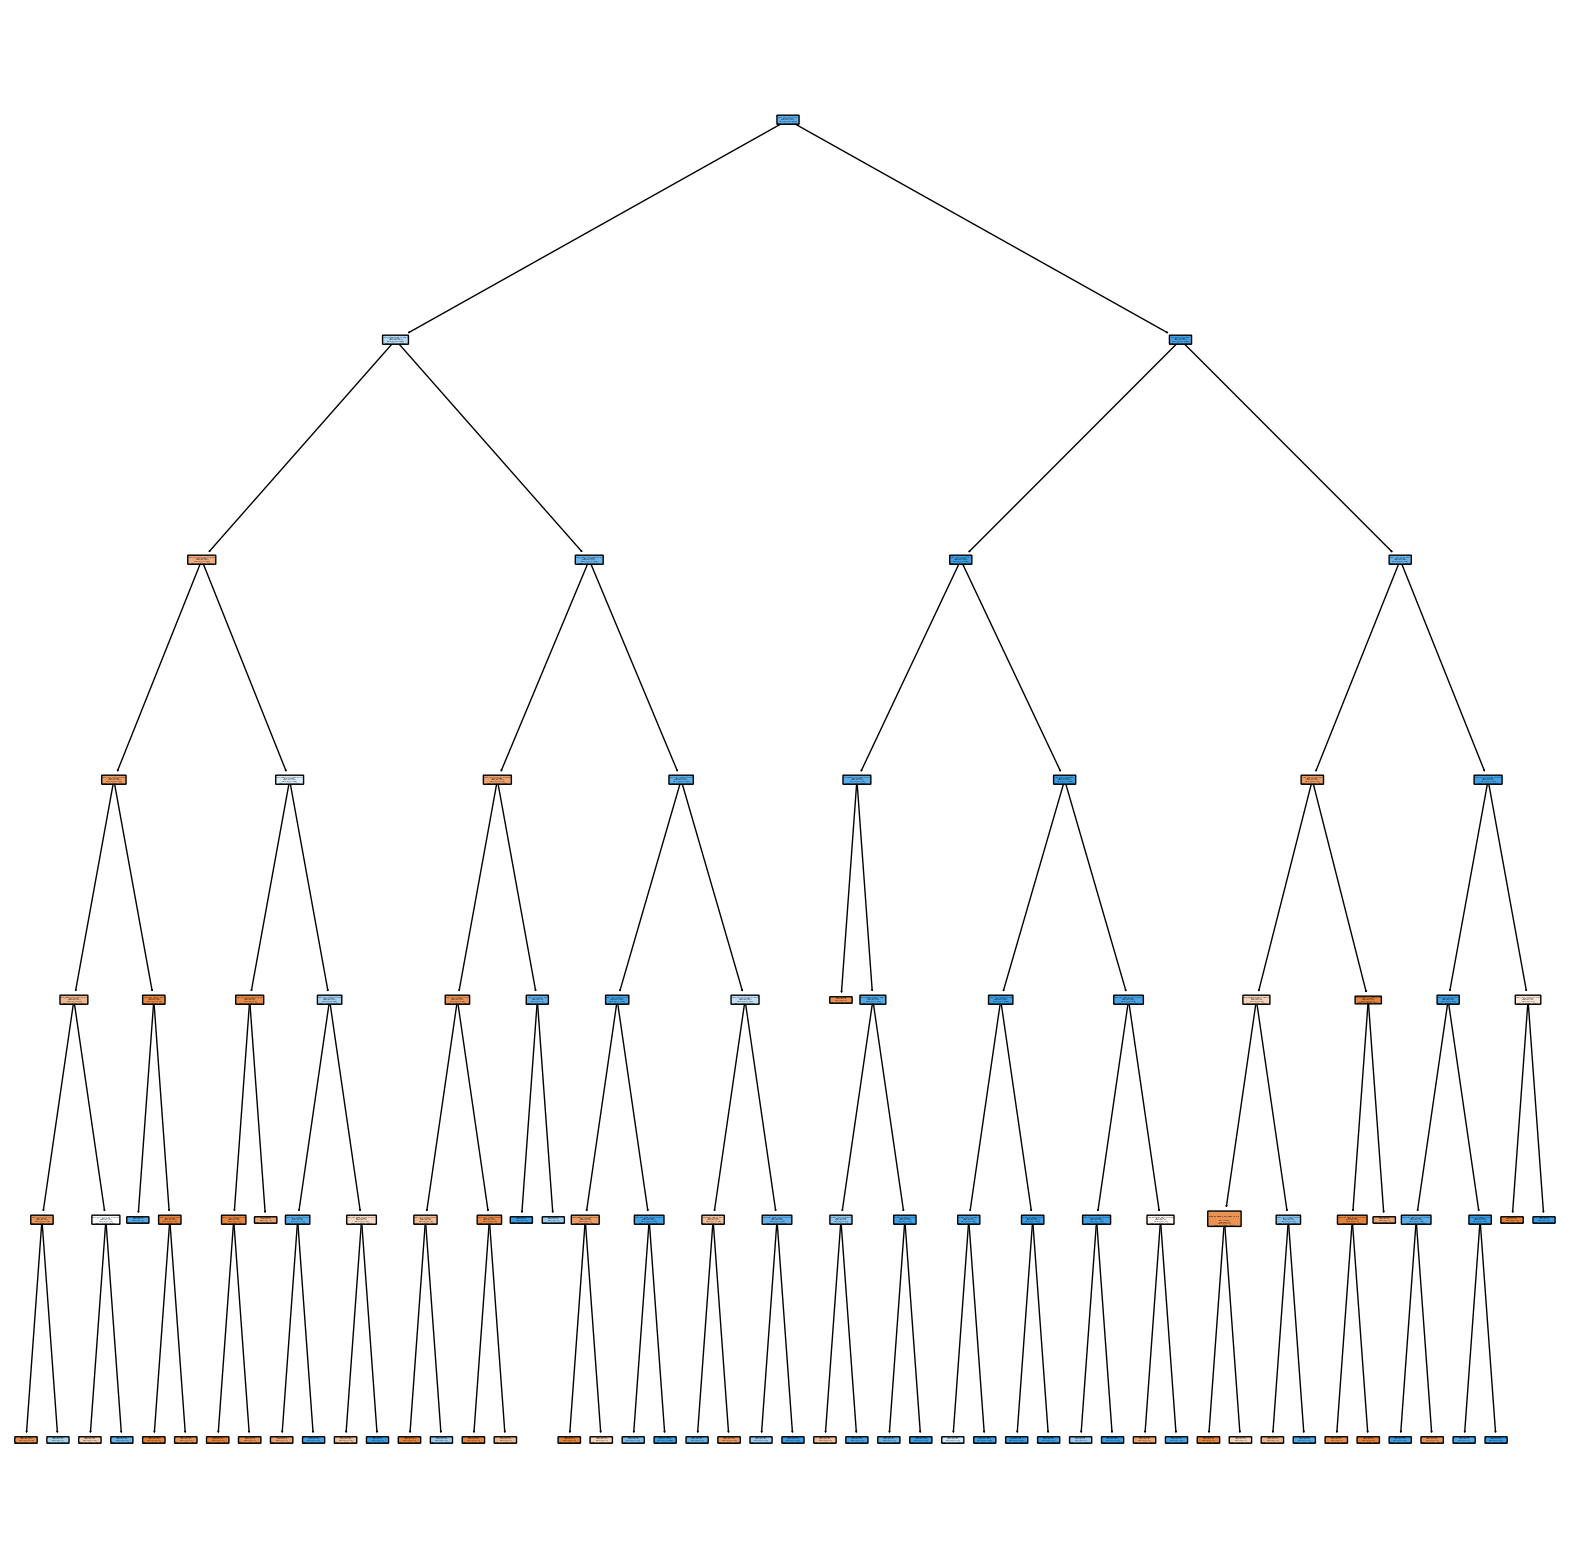

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=123)
dt_v = DecisionTreeClassifier(random_state=1234, max_depth = 6, min_samples_leaf = 9)
dt_v = dt_v.fit(X_train1, y_train1)
plt.figure(figsize=(20,20))
plot_tree(dt_v, filled=True, rounded=True, class_names=['Existing Customer','Attrited Customer'], feature_names=X.columns)

precision: when our model predict a customer is leaving, if this number is high, which means this customer will have high chance of leaving.    

recall: means customers leaving and we successfully predict that.     

F1: consider both precision and recall


# the confusion matrix    
first row first number: 1663, model predict customer not leaving, and its true. (TN)    
first row second number: 44, model predict customer is leaving, and its false.(FP)    
second row first number: 215, model predict customer not leaving, and its false.(FN)    
second row second number: 104, model predict customer is leaving, and its true.(TP)     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Threshold:  0.1347517730496454
Best G-Mean:  0.779606859829383
AUC:  0.8340054689063839


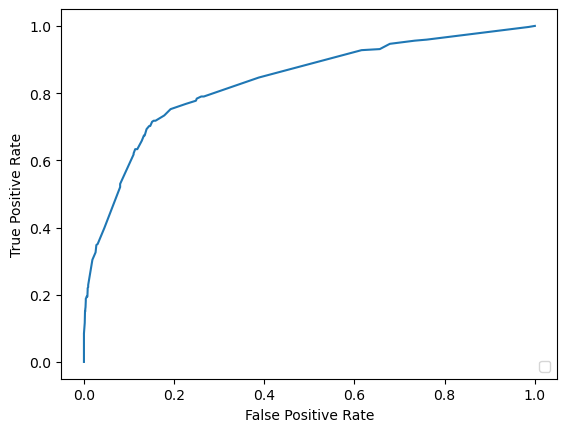

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the test set
y_pred_prob = best_dt.predict_proba(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

# Compute G-mean
gmeans = np.sqrt(tpr * (1 - fpr))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Find the index with the highest gmean
index = np.argmax(gmeans)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")

# Print results
print("Best Threshold: ", thresholds[index])
print("Best G-Mean: ", gmeans[index])
print("AUC: ", roc_auc)

# ROC       
The ROC plot is to see our model's preformance, the y-axis is true positive rate (the model predict leaving number/ people real leave). x-axis is false positive rate(predict leaving but is wrong/ people who stay with bank account)     
# AUC     
Area under the curve. its between 0.5 to 1.  the higher the better.    
# best threshold       
our model is to give a predict if a person will be Attrition. we need a threshold to decide weither this person is leaving if threshold is 0.6, we say proboliblity > 0.6 will Attrition, now the best threshold is 0.1347    
# G-Mean    
we care both Ture positive and False positive. higher the g-mean means our modle is more balance. we find a best gmean 0.780.

# Logistic 

In [ ]:
features = df_new_select[['Attrition_Flag', 'Gender', 'Dependent_count', 
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Ct_Chng_Q4_Q1','Avg_Trans',
       'Credit_Limit','Total_Revolving_Bal',  'Education_Doctorate',
       'Education_Post-Graduate', 'Income_$120K +', 'Income_$40K - $60K', 
       'Income_$60K - $80K','Income_$80K - $120K', 'Income_Less than $40K', 
       'Income_Unknown','Marital_Married',  'Card_Blue',  'Card_Platinum']]

# Define X and y
X = features.drop('Attrition_Flag', axis=1)
y = features['Attrition_Flag']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Fit model
log_test = LogisticRegression()
log_test.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Predict the test set results
pred = log_test.predict(X_test)
test_log_pred_prob = log_test.predict_proba(X_test)

In [ ]:
# Display the results
print(f'ROC AUC Score: {roc_auc_score(y_test, test_log_pred_prob[:,1])}')
print("Logistic Regression F1: ", f1_score(y_test, pred))
print("Logistic Regression precision: ", precision_score(y_test, pred))
print("Logistic Regression recall: ", recall_score(y_test, pred))
print("Logistic Regression accuracy: ", accuracy_score(y_test, pred))

ROC AUC Score: 0.8310074871495391
Logistic Regression F1:  0.5252525252525253
Logistic Regression precision:  0.7386363636363636
Logistic Regression recall:  0.40752351097178685
Logistic Regression accuracy:  0.8840078973346496


In [ ]:
# Predict the probabilities of the test set
test_log_pred_prob = log_test.predict_proba(X_test)

In [ ]:
test_log_pred_prob

array([[0.92946975, 0.07053025],
       [0.8970347 , 0.1029653 ],
       [0.98064735, 0.01935265],
       ...,
       [0.99248287, 0.00751713],
       [0.95459828, 0.04540172],
       [0.91826446, 0.08173554]])

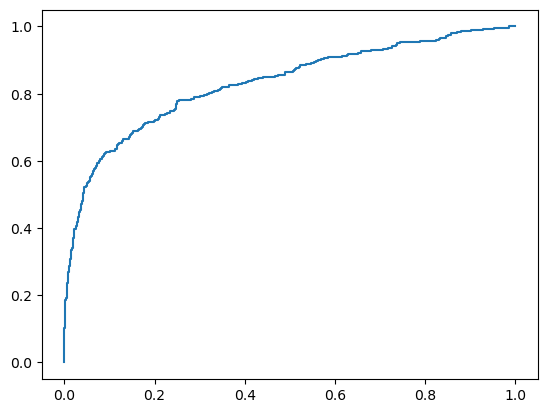

In [ ]:

# Compute ROC curve
fpr,tpr,tresholds = roc_curve(y_test,test_log_pred_prob[:,1])
plt.plot(fpr,tpr)

In [ ]:

# Compute G-mean
gmeans = np.sqrt(tpr*(1-fpr))
print(tresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.18374393105522993
0.7644953238440506


In [ ]:
test_y_pred_new = []
for i in test_log_pred_prob[:,1]:
    if i < 0.18790704404219577:
        test_y_pred_new.append(0)
    else:
        test_y_pred_new.append(1)

In [ ]:
# Print results
print(f'ROC AUC Score: {roc_auc_score(y_test, test_log_pred_prob[:,1])}')
print("optimal threshold F1: ", f1_score(y_test, test_y_pred_new))
print("optimal threshold precision: ", precision_score(y_test, test_y_pred_new))
print("optimal threshold recall: ", recall_score(y_test, test_y_pred_new))
print("optimal threshold accuracy: ", accuracy_score(y_test, test_y_pred_new))

ROC AUC Score: 0.8310074871495391
optimal threshold F1:  0.5326991676575505
optimal threshold precision:  0.42911877394636017
optimal threshold recall:  0.7021943573667712
optimal threshold accuracy:  0.8060217176702863


# K-nn Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
features = df_new_select[['Attrition_Flag', 'Gender', 'Dependent_count', 
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Ct_Chng_Q4_Q1','Avg_Trans',
       'Credit_Limit','Total_Revolving_Bal',  'Education_Doctorate',
       'Education_Post-Graduate', 'Income_$120K +', 'Income_$40K - $60K', 
       'Income_$60K - $80K','Income_$80K - $120K', 'Income_Less than $40K', 
       'Income_Unknown','Marital_Married',  'Card_Blue',  'Card_Platinum']]

# Define X and y
X = features.drop('Attrition_Flag', axis=1)
y = features['Attrition_Flag']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# Define the hyperparameters for the grid search
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform a grid search
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid.fit(X_train, y_train)

# Best parameters and score
best_knn_params = knn_grid.best_params_
best_knn_score = knn_grid.best_score_

best_knn_params, best_knn_score


Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'},
 0.8837178274164575)

The grid search above performs preprocessing (encoding for categorical features and scaling for numerical features) and then fits a KNN model using GridSearchCV for hyperparameter tuning.

In [ ]:
# Fit the model on the training data
knn_grid.fit(X_train, y_train)

# Identify the best hyperparameters
best_params = knn_grid.best_params_
print(f"Best parameters: {best_params}")

# Make predictions on the test data
y_pred = knn_grid.predict(X_test)
y_proba = knn_grid.predict_proba(X_test)



# Print the performance metrics
print('Performance Metrics:\n')
# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
# ROC AUC Score
print(f'KNN ROC AUC Score: {roc_auc_score(y_test, y_proba[:,1])}')
# Accuracy
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred)}')
# Precision
print(f'KNN Precision: {precision_score(y_test, y_pred)}')
# Recall
print(f'KNN Recall: {recall_score(y_test, y_pred)}')
# F1 Score
print(f'KNN F1 Score: {f1_score(y_test, y_pred)}')



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Performance Metrics:

Confusion Matrix:
[[1679   28]
 [ 189  130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1707
           1       0.82      0.41      0.55       319

    accuracy                           0.89      2026
   macro avg       0.86      0.70      0.74      2026
weighted avg       0.89      0.89      0.88      2026

KNN ROC AUC Score: 0.8609964868979474
KNN Accuracy: 0.8928923988153998
KNN Precision: 0.8227848101265823
KNN Recall: 0.40752351097178685
KNN F1 Score: 0.5450733752620546


The model's performance on the test set was evaluated using a classification report, a confusion matrix, and an accuracy score. The above coding will print out a variety of performance metrics including the confusion matrix, classification report (which includes precision, recall, and f1-score), ROC AUC score, accuracy, precision, recall and f1-score.

## We can analyze decision tree using original dataset
Since the decision tree does not need to standardlize the features, it can process the category data (no need for dummy variables) and it's not necessary to have the normal distrubution.    
We now tring the original dataset, and let the decision choose the feature itself.    

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define X and y
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters for grid search
params = {'max_depth': list(range(1, 10)),
          'min_samples_leaf': list(range(1, 10)),
          'max_features': ['auto', 'sqrt', 'log2']}

# Grid search with cross-validation
grid_search = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

# Predict the test set results
y_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Attrited Customer')
recall = recall_score(y_test, y_pred, pos_label='Attrited Customer')
f1 = f1_score(y_test, y_pred, pos_label='Attrited Customer')

# Display the results
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

best_dt


c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users

Best Parameters: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 6}
Accuracy: 0.9052319842053307
Precision: 0.7368421052631579
Recall: 0.6422018348623854
F1 Score: 0.6862745098039216
Confusion Matrix:
 [[ 210  117]
 [  75 1624]]


c:\Users\anton\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=6,
                       random_state=42)